## Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Data Reading,Understanding 

In [2]:
# reading the dataset from .csv file
housing_data = pd.read_csv("train.csv")

In [3]:
# summary of the dataset
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# head of data set
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# check distribution of data 
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# rows and columns of dataset
print(housing_data.shape)

(1460, 81)


# 2. Data Cleaning

### 2.1 Removing/Imputing NaN values in Categorical attributes

In [7]:
# check for null values in all categorical columns

housing_data.select_dtypes(include='object').isnull().sum()[housing_data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housing_data[col]=housing_data[col].fillna('None')

**Remove categorical attributes that have more than 85% data associated to one value.**
- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value`

In [9]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housing_data.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housing_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

housing_data.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [10]:
# once again check for null values in all categorical columns

housing_data.select_dtypes(include='object').isnull().sum()[housing_data.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

* No more null values in the categorical variables

### 2.2 Removing/Imputing NaN values in numerical data

In [11]:
# check the null values in the numerical data

housing_data.select_dtypes(include=['int64','float']).isnull().sum()[housing_data.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [12]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

housing_data['LotFrontage'] = housing_data['LotFrontage'].replace(np.nan, housing_data['LotFrontage'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].replace(np.nan, housing_data['MasVnrArea'].median())

In [13]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].fillna(0)
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].astype(int)

In [14]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing_data['IsRemodelled'] = housing_data.apply(checkForRemodel, axis=1)
housing_data.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [15]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing_data['BuiltOrRemodelAge'] = housing_data.apply(getBuiltOrRemodelAge, axis=1)
housing_data.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [16]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing_data['OldOrNewGarage'] = housing_data['GarageYrBlt'].apply(getGarageConstructionPeriod)
housing_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [17]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

housing_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

**Remove numerical attributes that have more than 85% data associated to one value.**
- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [18]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housing_data.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housing_data.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_data.drop(['MoSold'], axis = 1, inplace = True)

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [19]:
# check for percentage of null values in each column

percent_missing = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


### 2.3 Drop duplicates

In [20]:
# Let's drop duplicate columns if any present in data set 
housing_data = housing_data.drop_duplicates()
housing_data.shape

(1460, 49)

### 2.4 Outlier Treatment


In [21]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


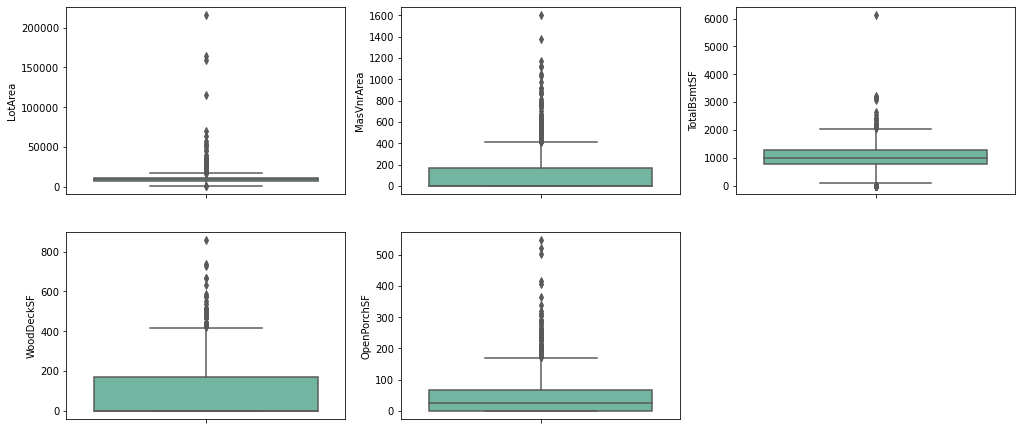

In [22]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set2', data = housing_data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set2', data = housing_data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set2', data = housing_data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set2', data = housing_data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set2', data = housing_data)
plt.show()

In [23]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housing_data['LotArea'].quantile(0.98)
housing_data = housing_data[housing_data["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housing_data['MasVnrArea'].quantile(0.98)
housing_data = housing_data[housing_data["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housing_data['TotalBsmtSF'].quantile(0.99)
housing_data = housing_data[housing_data["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housing_data['WoodDeckSF'].quantile(0.99)
housing_data = housing_data[housing_data["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housing_data['OpenPorchSF'].quantile(0.99)
housing_data = housing_data[housing_data["OpenPorchSF"] < nn_quartile_OpenPorchSF]


In [24]:
# Determine the percentage of data retained

num_data = round(100*(len(housing_data)/1460),2)
print(num_data)

93.01


# 3. Data Visualization

### 3.1 EDA on the cleaned data


#### All numeric (float and int) variables in the dataset


In [25]:
data_numeric = housing_data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,65.0,8450,7,5,196.0,706,150,856,...,8,0,2,548,0,61,208500,0,5,1
1,2,20,80.0,9600,6,8,0.0,978,284,1262,...,6,1,2,460,298,0,181500,0,31,0
2,3,60,68.0,11250,7,5,162.0,486,434,920,...,6,1,2,608,0,42,223500,1,6,1
3,4,70,60.0,9550,7,5,0.0,216,540,756,...,7,1,3,642,0,35,140000,1,36,0
4,5,60,84.0,14260,8,5,350.0,655,490,1145,...,9,1,3,836,192,84,250000,0,8,1


In [26]:
# Dropping ID Column
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,8,0,2,548,0,61,208500,0,5,1
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,6,1,2,460,298,0,181500,0,31,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,6,1,2,608,0,42,223500,1,6,1
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,7,1,3,642,0,35,140000,1,36,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,9,1,3,836,192,84,250000,0,8,1


### 3.1.1 Target variable 'sale Price' vs a few select columns

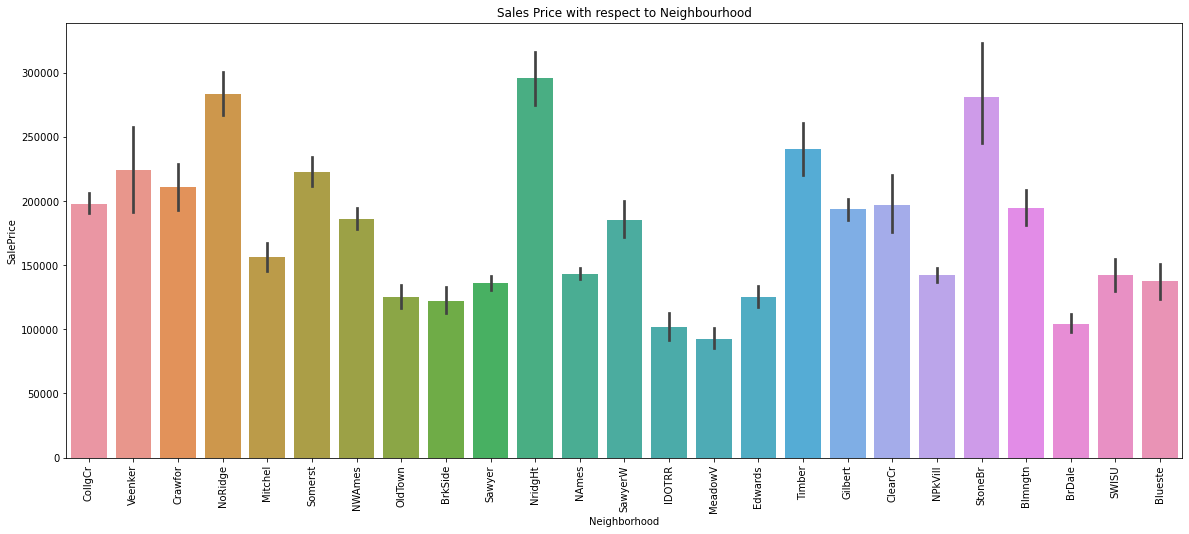

In [27]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice",data=housing_data)
plt.title("Sales Price with respect to Neighbourhood")
text=plt.xticks(rotation=90)

* **Properties in some of the Neighborhoods are high priced.**


Text(0.5, 1.0, 'Sales Price with respect to Overall Condition')

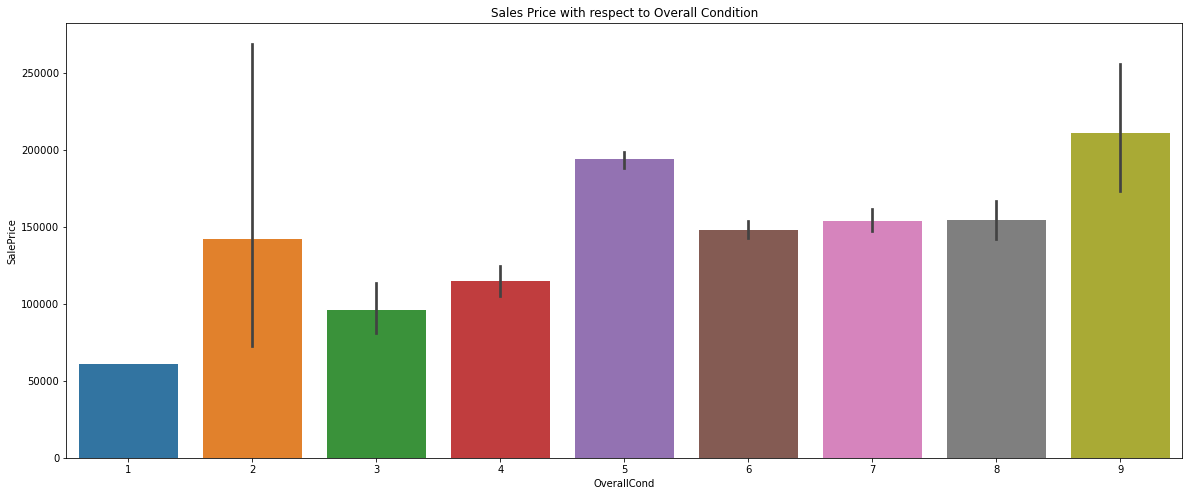

In [28]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housing_data)
plt.title("Sales Price with respect to Overall Condition")
#plt.xticks(rotation=90)

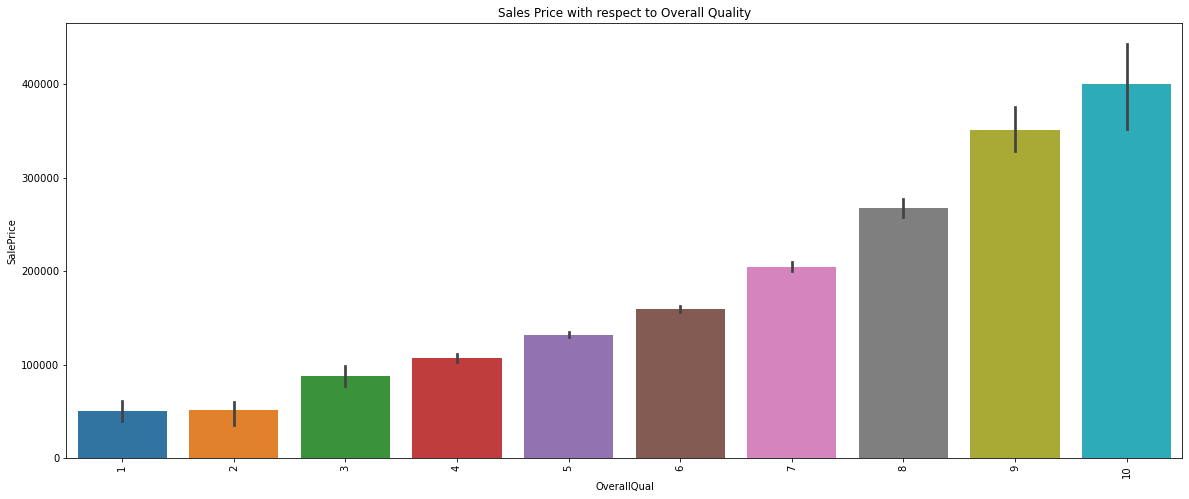

In [29]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housing_data)
plt.title("Sales Price with respect to Overall Quality")
text=plt.xticks(rotation=90)

* **Increase in the overall quality has a direct positive effect on the sale price**


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

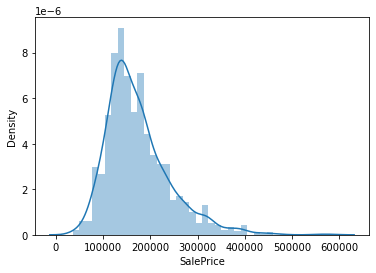

In [30]:
sns.distplot(housing_data['SalePrice'])


* **Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data**


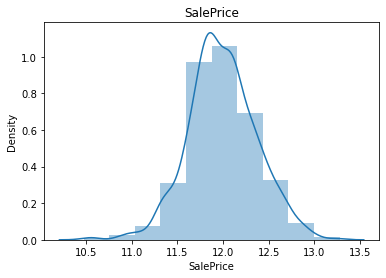

In [31]:
# Visualise the target variable -> SalePrice after transforming the sales price

housing_data['SalePrice'] = np.log1p(housing_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_data['SalePrice'], bins=10)
plt.show()

### 3.1.2 Check pairplot and heatmap

In [32]:
# correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
MSSubClass,1.000000,-0.401931,-0.393699,0.060222,-0.059830,0.024548,-0.071873,-0.129118,-0.245604,-0.253736,...,0.051450,-0.031299,-0.040892,-0.105249,-0.030496,0.004843,-0.069081,-0.047843,-0.048133,0.040748
LotFrontage,-0.401931,1.000000,0.570154,0.190775,-0.051785,0.162426,0.107511,0.141324,0.288790,0.344437,...,0.305140,0.203051,0.272192,0.304673,0.079295,0.134818,0.344203,-0.046754,-0.065145,0.078414
LotArea,-0.393699,0.570154,1.000000,0.171768,-0.005919,0.096369,0.142376,0.092427,0.287169,0.391483,...,0.370356,0.308544,0.258948,0.296699,0.136089,0.133542,0.377013,0.002721,-0.039391,-0.017580
OverallQual,0.060222,0.190775,0.171768,1.000000,-0.088590,0.366129,0.193002,0.285256,0.507715,0.429465,...,0.386576,0.377691,0.586480,0.539509,0.219328,0.358891,0.800134,-0.100826,-0.548074,0.563296
OverallCond,-0.059830,-0.051785,-0.005919,-0.088590,1.000000,-0.125851,-0.017521,-0.143153,-0.162739,-0.136004,...,-0.047843,-0.011391,-0.177895,-0.136103,0.003890,-0.055243,-0.068653,0.317140,-0.073388,-0.290144
MasVnrArea,0.024548,0.162426,0.096369,0.366129,-0.125851,1.000000,0.213629,0.086560,0.307658,0.299629,...,0.241253,0.224874,0.336142,0.338542,0.123847,0.164114,0.407368,-0.162473,-0.142217,0.165754
BsmtFinSF1,-0.071873,0.107511,0.142376,0.193002,-0.017521,0.213629,1.000000,-0.558481,0.427601,0.348825,...,-0.038561,0.204278,0.189729,0.230009,0.195079,0.064733,0.354492,-0.126288,-0.121970,0.011541
BsmtUnfSF,-0.129118,0.141324,0.092427,0.285256,-0.143153,0.086560,-0.558481,1.000000,0.437582,0.311913,...,0.238135,0.039859,0.204051,0.175354,-0.040374,0.137854,0.203009,0.031564,-0.174480,0.335792
TotalBsmtSF,-0.245604,0.288790,0.287169,0.507715,-0.162739,0.307658,0.427601,0.437582,1.000000,0.770977,...,0.214726,0.277055,0.421145,0.444024,0.202218,0.224610,0.606054,-0.110048,-0.303012,0.329473
1stFlrSF,-0.253736,0.344437,0.391483,0.429465,-0.136004,0.299629,0.348825,0.311913,0.770977,1.000000,...,0.361194,0.360585,0.419848,0.447568,0.188469,0.182961,0.584060,-0.042623,-0.242892,0.217796


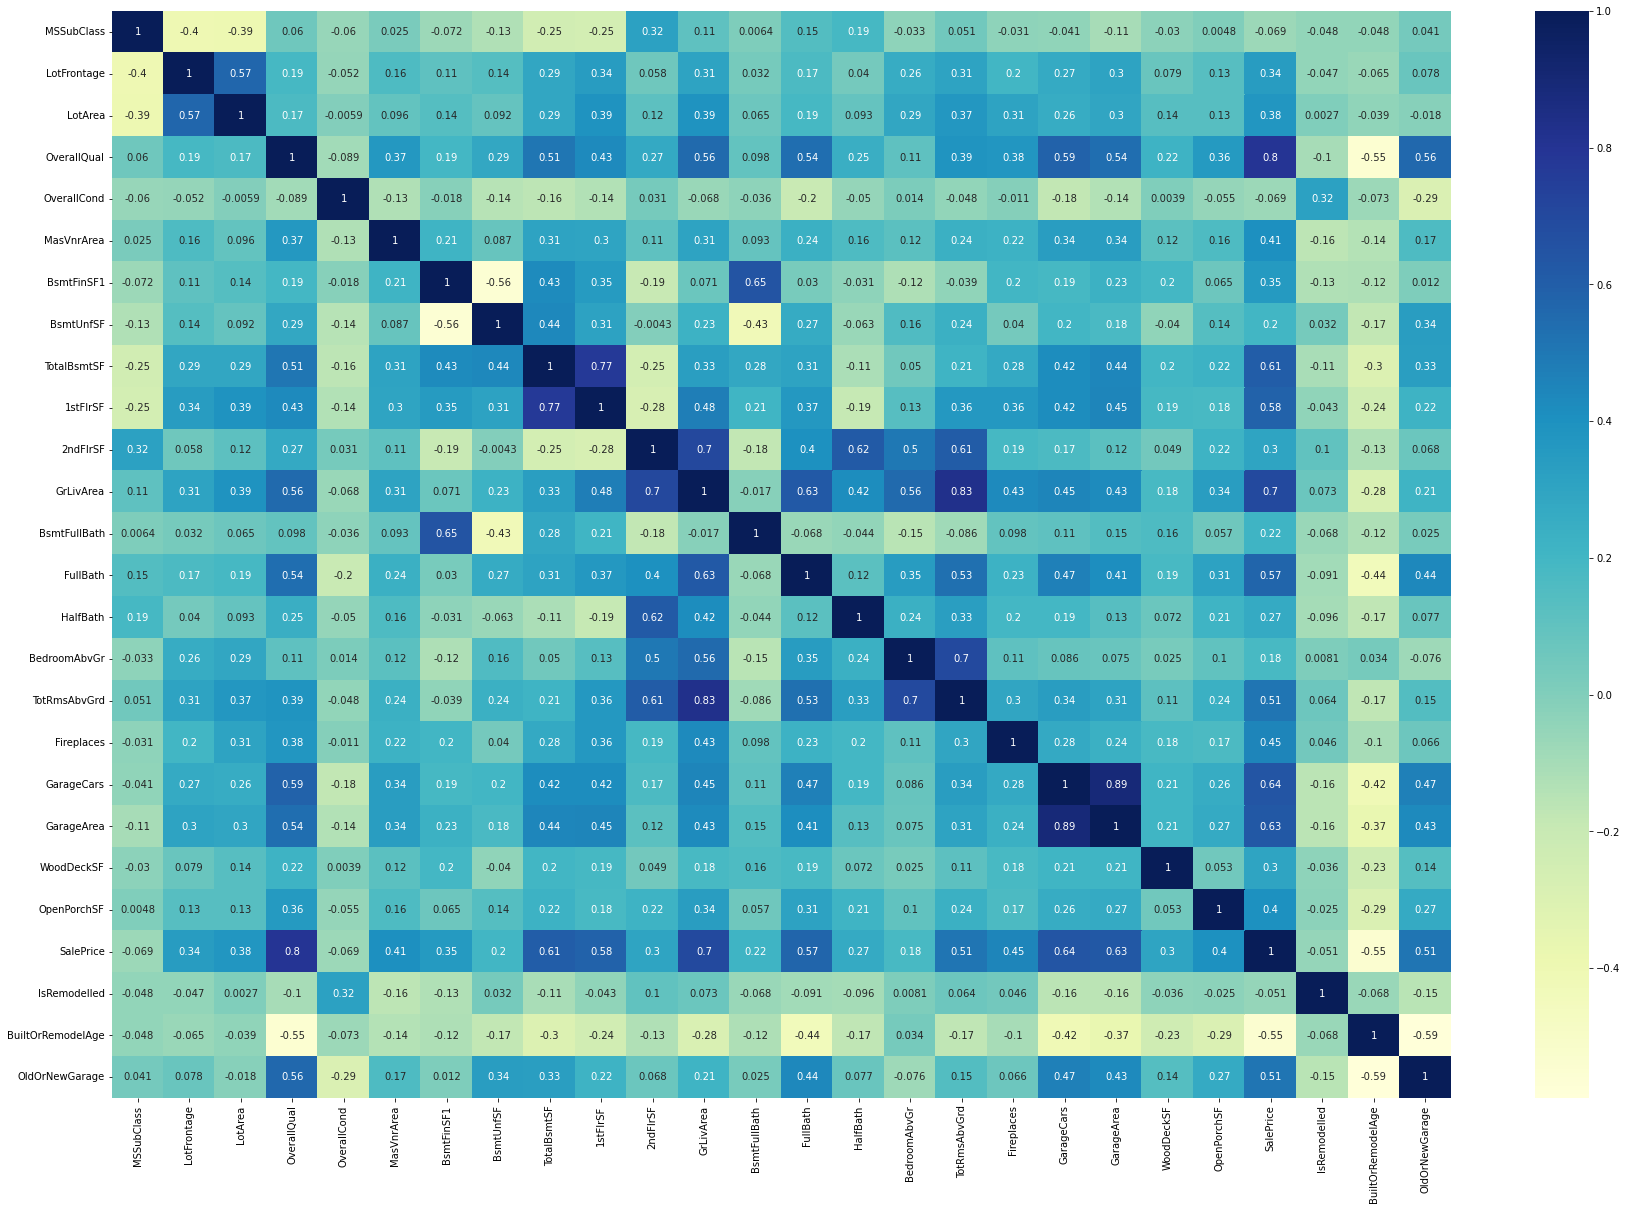

In [33]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

* We can see that some of the variables are correlated
* Before dropping these columns, we will first check their predictive power


<Figure size 720x360 with 0 Axes>

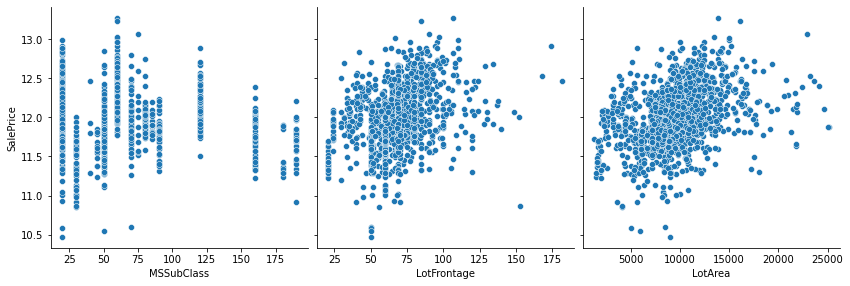

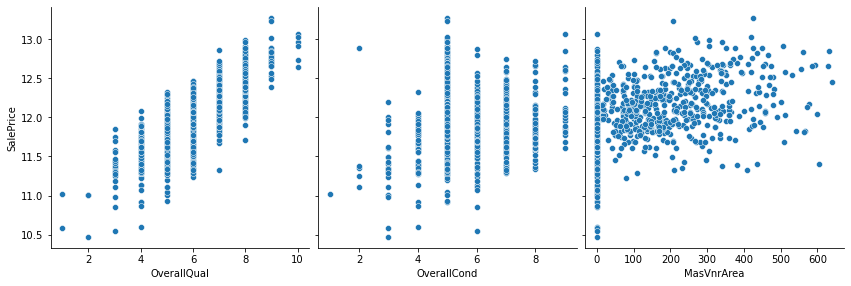

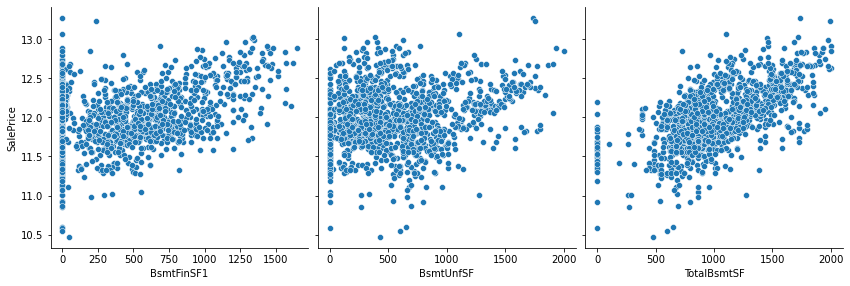

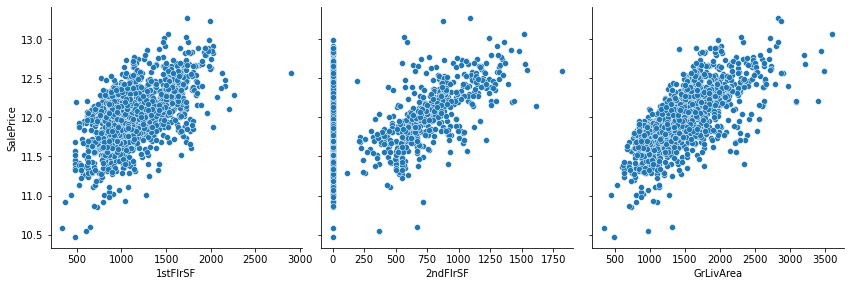

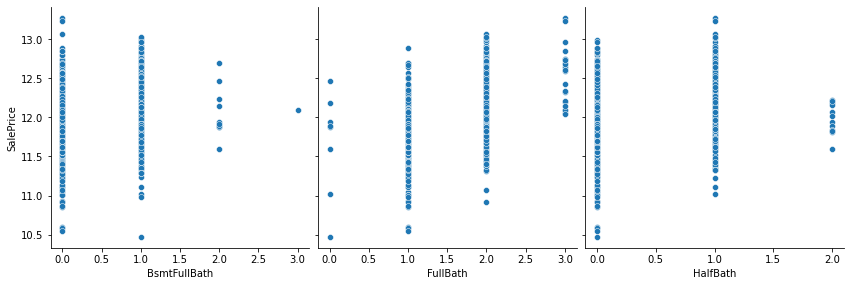

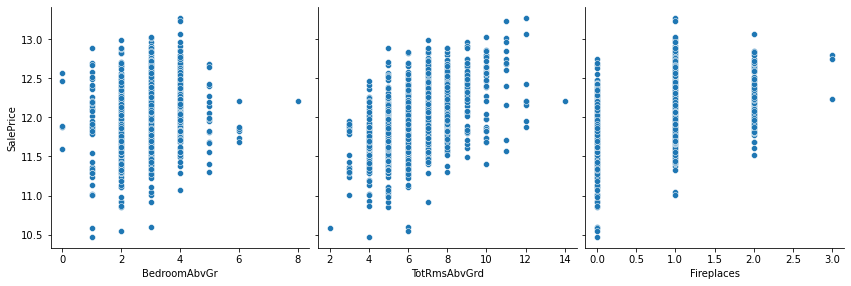

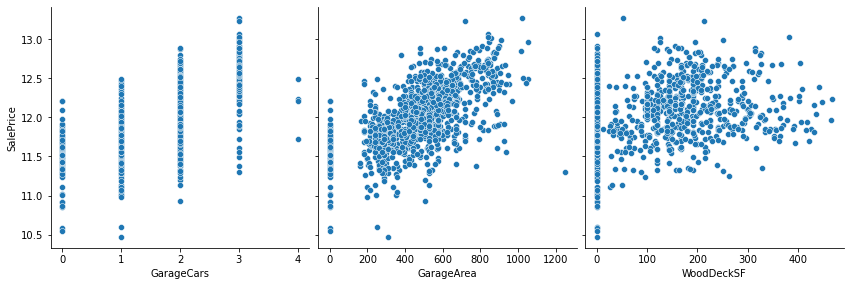

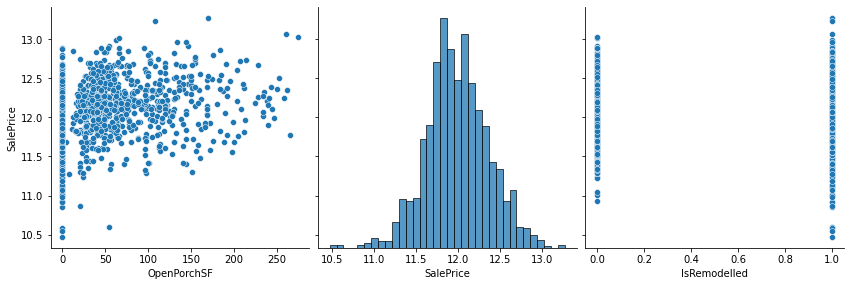

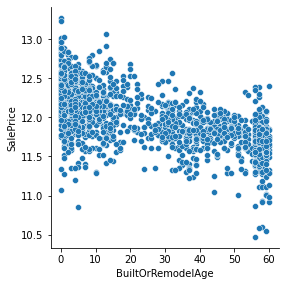

In [34]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Observations :

- 1stFlrSF, GrLivArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood during further analysis

### 3.1.3 Drop columns that are correlated and not contributing to 'SalePrice'


Removing following columns which shows high correlation in heat map
- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%

Hence dropping TotRmsAbvGrd and Garage Cars



In [35]:
# Removing the highly correlated variables

housing_data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

# Check the shape of the dataframe

housing_data.shape

(1358, 47)

# 4. Data Preparation


In [36]:
#type of each feature in data: int, float, object
types = housing_data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [37]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()


object     22
int64      22
float64     3
Name: 0, dtype: int64

In [38]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'IsRemodelled', 'BuiltOrRemodelAge', 'OldOrNewGarage']


In [39]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition']


## 4.1 Creating Dummy columns to convert categorical into numerical


In [40]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

housing_data['d_LotShape'] = housing_data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_data['d_ExterQual'] = housing_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_data['d_BsmtQual'] = housing_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_BsmtExposure'] = housing_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_data['d_BsmtFinType1'] = housing_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing_data['d_HeatingQC'] = housing_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_KitchenQual'] = housing_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_FireplaceQu'] = housing_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_GarageFinish'] = housing_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_data['d_BldgType'] = housing_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing_data['d_HouseStyle'] = housing_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing_data['d_Fence'] = housing_data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing_data['d_LotConfig'] = housing_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing_data['d_MasVnrType'] = housing_data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_data['d_SaleCondition'] = housing_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [41]:
# drop the old columns from which the new columns were derived

housing_data = housing_data.drop([ 'Id','LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [42]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housing_data['MSZoning'], prefix='MSZoning', drop_first = True)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housing_data['Neighborhood'], prefix='Neighborhood', drop_first = True)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housing_data['RoofStyle'], prefix='RoofStyle', drop_first = True)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housing_data['Exterior1st'], prefix='Exterior1st', drop_first = True)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housing_data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housing_data['Foundation'], prefix='Foundation', drop_first = True)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housing_data['GarageType'], prefix='GarageType', drop_first = True)



In [43]:
# concating the dummie columns to dataset
housing_data = pd.concat([housing_data, d_MSZoning], axis = 1)
housing_data = pd.concat([housing_data, d_RoofStyle], axis = 1)
housing_data = pd.concat([housing_data, d_Neighborhood], axis = 1)
housing_data = pd.concat([housing_data, d_Exterior1st], axis = 1)
housing_data = pd.concat([housing_data, d_Exterior2nd], axis = 1)
housing_data = pd.concat([housing_data, d_Foundation], axis = 1)
housing_data = pd.concat([housing_data, d_GarageType], axis = 1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [44]:
# drop the below columns as we now have new columns derived from these columns

housing_data = housing_data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [45]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 561.2 KB


* All columns in the data set are now numeric !!!



# 5. Train Test Split

In [46]:
# split into X and y
X = housing_data.drop(['SalePrice'], axis=1)
y = housing_data['SalePrice']

In [47]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [48]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## 5.1 Scaling the features

In [49]:
# scaling the features - necessary before using Ridge or Lasso
# Scale data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [50]:
# Check data after scaling
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
count,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,...,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03
mean,-1.300710e-16,1.813156e-16,4.302319e-18,1.476482e-16,2.925577e-16,1.664517e-16,1.008030e-16,1.057900e-16,4.674301e-17,-5.203659e-17,...,1.173991e-16,2.742038e-16,1.373881e-16,1.574485e-16,1.865633e-16,-2.059595e-16,1.344858e-16,3.445943e-17,1.067711e-16,1.682094e-16
std,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,...,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00
min,-8.789233e-01,-2.459823e+00,-2.250443e+00,-3.808091e+00,-4.095262e+00,-6.259005e-01,-1.013304e+00,-1.300285e+00,-2.695149e+00,-2.333072e+00,...,-8.751741e-01,-1.341306e-01,-6.079055e-02,-4.705340e-02,-1.190113e+00,-1.191205e-01,-2.451720e-01,-8.167992e-02,-6.165073e-01,-2.485297e-01
25%,-8.789233e-01,-4.516665e-01,-5.584493e-01,-7.759084e-01,-5.268527e-01,-6.259005e-01,-1.013304e+00,-7.916096e-01,-6.190030e-01,-7.709549e-01,...,-8.751741e-01,-1.341306e-01,-6.079055e-02,-4.705340e-02,-1.190113e+00,-1.191205e-01,-2.451720e-01,-8.167992e-02,-6.165073e-01,-2.485297e-01
50%,-1.693051e-01,1.175425e-02,-5.213077e-02,-1.786264e-02,-5.268527e-01,-6.259005e-01,-1.249544e-01,-1.873759e-01,-1.264480e-01,-1.835988e-01,...,-8.751741e-01,-1.341306e-01,-6.079055e-02,-4.705340e-02,8.402560e-01,-1.191205e-01,-2.451720e-01,-8.167992e-02,-6.165073e-01,-2.485297e-01
75%,3.037737e-01,4.751750e-01,5.073025e-01,7.401831e-01,3.652495e-01,4.542225e-01,6.585964e-01,5.566999e-01,6.196670e-01,6.536961e-01,...,1.142630e+00,-1.341306e-01,-6.079055e-02,-4.705340e-02,8.402560e-01,-1.191205e-01,-2.451720e-01,-8.167992e-02,1.622041e+00,-2.485297e-01
max,3.142247e+00,5.830259e+00,4.332183e+00,3.014320e+00,3.041556e+00,4.149773e+00,2.998282e+00,3.365775e+00,2.617031e+00,5.206257e+00,...,1.142630e+00,7.455423e+00,1.644992e+01,2.125245e+01,8.402560e-01,8.394861e+00,4.078770e+00,1.224291e+01,1.622041e+00,4.023664e+00


In [51]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

 # 6. Model Building and Evaluation

## 6.1 Lets first check the model using Linear Regression and RFE (OPTIONAL)

In [52]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [53]:
# Running RFE 
# Since there are more than 111 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [54]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('IsRemodelled', True, 1),
 ('BuiltOrRemodelAge', True, 1),
 ('OldOrNewGarage', True, 1),
 ('d_LotShape', True, 1),
 ('d_ExterQual', True, 1),
 ('d_BsmtQual', True, 1),
 ('d_BsmtExposure', True, 1),
 ('d_BsmtFinType1', True, 1),
 ('d_HeatingQC', True, 1),
 ('d_KitchenQual', True, 1),
 ('d_FireplaceQu', True, 1),
 ('d_GarageFinish', True, 1),
 ('d_BldgType', True, 1),
 ('d_HouseStyle', True, 1),
 ('d_Fence', True, 1),
 ('d_LotConfig', True, 1),
 ('d_MasVnrType', True, 1),
 ('d_Sa

In [55]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'IsRemodelled', 'BuiltOrRemodelAge', 'OldOrNewGarage', 'd_LotShape',
       'd_ExterQual', 'd_BsmtQual', 'd_BsmtExposure', 'd_BsmtFinType1',
       'd_HeatingQC', 'd_KitchenQual', 'd_FireplaceQu', 'd_GarageFinish',
       'd_BldgType', 'd_HouseStyle', 'd_Fence', 'd_LotConfig', 'd_MasVnrType',
       'd_SaleCondition', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborho

In [56]:
X_train.columns[~rfe.support_]

Index(['Neighborhood_NPkVill', 'Neighborhood_Somerst', 'Neighborhood_Veenker',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Other', 'Exterior2nd_Stone'],
      dtype='object')

In [57]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [58]:
X_train_rfe = pd.DataFrame(X_train[col])


In [59]:
X_train_rfe.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
28,-0.878923,-1.121052,1.904952,-0.775908,0.365250,-0.625900,2.098965,-0.817830,1.234699,1.389545,...,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853
347,-0.878923,0.011754,2.258773,-0.017863,-0.526853,-0.402041,2.081905,-0.815499,1.218810,1.030810,...,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853
873,-0.405845,-0.451667,0.749431,-0.775908,1.257352,-0.625900,-0.099364,-0.235155,-0.491892,-0.268872,...,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853
951,-0.878923,-0.451667,-0.452289,-0.775908,-0.526853,-0.625900,0.548924,-0.864444,-0.502485,-0.477644,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,-0.245172,-0.08168,1.622041,-0.24853
1273,0.540313,2.843770,0.574595,-0.017863,1.257352,0.000907,0.739023,-0.601075,0.003311,0.675014,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,8.394861,-0.245172,-0.08168,-0.616507,-0.24853


In [60]:
X_train_rfe.shape

(950, 100)

In [61]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9284533666659978

In [62]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8852879905271767

In [63]:
# Associate the new columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]


## 6.2 Lasso and Ridge Regression

Let's now try predicting house prices and perform lasso and ridge regression.



### 6.2.1 Lasso Regression

In [64]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (950, 100)
y_train (950,)


In [65]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060555,0.023478,0.008048,0.004056,0.0001,{'alpha': 0.0001},-0.088031,-0.070814,-0.083734,-0.077293,...,-0.080193,0.005851,3,-0.068129,-0.073592,-0.069117,-0.071299,-0.069983,-0.070424,0.001896
1,0.050378,0.009929,0.008331,0.003897,0.0002,{'alpha': 0.0002},-0.087976,-0.071278,-0.083657,-0.077071,...,-0.080158,0.005695,1,-0.068396,-0.073634,-0.069306,-0.071483,-0.070150,-0.070594,0.001829
2,0.033844,0.013979,0.006633,0.003504,0.0003,{'alpha': 0.0003},-0.088026,-0.071765,-0.083780,-0.076868,...,-0.080187,0.005593,2,-0.068752,-0.073758,-0.069531,-0.071665,-0.070434,-0.070828,0.001757
3,0.027923,0.011012,0.007683,0.003205,0.0004,{'alpha': 0.0004},-0.088309,-0.071978,-0.084008,-0.076728,...,-0.080275,0.005655,4,-0.069106,-0.073919,-0.069749,-0.071877,-0.070786,-0.071087,0.001700
4,0.023260,0.006731,0.001283,0.002566,0.0005,{'alpha': 0.0005},-0.088831,-0.072186,-0.084196,-0.076572,...,-0.080379,0.005791,5,-0.069368,-0.074149,-0.069932,-0.072049,-0.071133,-0.071326,0.001692


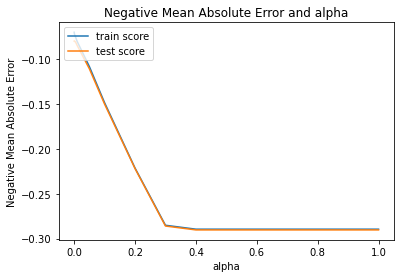

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [68]:
# display the mean scores

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.070594,-0.080158,1
2,0.0003,-0.070828,-0.080187,2
0,0.0001,-0.070424,-0.080193,3
3,0.0004,-0.071087,-0.080275,4
4,0.0005,-0.071326,-0.080379,5
6,0.002,-0.073540,-0.080525,6
7,0.003,-0.074423,-0.080663,7
5,0.001,-0.072379,-0.080669,8
8,0.004,-0.075210,-0.081002,9
9,0.005,-0.076032,-0.081595,10


In [69]:
# get the best estimator for lambda

model_cv.best_estimator_

Lasso(alpha=0.0002)

In [70]:
# check the coefficient values with lambda = 0.0002

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00389911,  0.00850308,  0.01966174,  0.06966334,  0.03727908,
        0.00113202,  0.01262137, -0.01070201,  0.05565014,  0.00061603,
       -0.        ,  0.09864248,  0.01052836,  0.00456855,  0.01008529,
        0.00145528,  0.00682003,  0.03256834,  0.01035258,  0.00912418,
       -0.01726308, -0.02742386,  0.01428836,  0.00088615, -0.00082624,
        0.0092689 ,  0.01021337,  0.00938177,  0.01521633,  0.01519361,
        0.00662415,  0.01218437, -0.01799367,  0.00872446, -0.00330057,
       -0.00481535,  0.00268705,  0.01530725,  0.06419835,  0.02488658,
        0.10929583,  0.0871803 ,  0.01924274,  0.00922548,  0.0172906 ,
        0.00397419,  0.00013904, -0.00077355, -0.0070278 , -0.00067908,
       -0.00391072, -0.00425441,  0.01507975, -0.01890677, -0.00880259,
       -0.01231006, -0.01920814, -0.01118502, -0.01430442, -0.00722675,
        0.00468457,  0.02086071, -0.03027091, -0.00060504, -0.01248353,
       -0.00529215,  0.01180276, -0.00147806,  0.00278729,  0.00

In [71]:
# Lasso regression
lm = Lasso(alpha=0.0002)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9280209549683506
0.8887688103141508


In [72]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.01640884144692063

In [73]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12809700014801528


In [74]:
# Put the shortlisted Variables and coefficienst in a dataframe

lasso_pred_df = pd.DataFrame({'Variables':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_pred_df = lasso_pred_df[lasso_pred_df['Coefficient'] != 0.00]
lasso_pred_df.reset_index(drop=True, inplace=True)
lasso_pred_df

,Variables,Coefficient
0,MSSubClass,-0.0039
1,LotFrontage,0.0085
2,LotArea,0.0197
3,OverallQual,0.0697
4,OverallCond,0.0373
...,...,...
92,GarageType_Attchd,0.0092
93,GarageType_Basment,0.0001
94,GarageType_BuiltIn,0.0073
95,GarageType_CarPort,-0.0012


In [75]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.0038991076051746406,
 'LotFrontage': 0.008503080171650974,
 'LotArea': 0.0196617393611672,
 'OverallQual': 0.06966334163227211,
 'OverallCond': 0.0372790761002523,
 'MasVnrArea': 0.001132024749292612,
 'BsmtFinSF1': 0.01262136946066569,
 'BsmtUnfSF': -0.010702006948770815,
 'TotalBsmtSF': 0.0556501426247886,
 '1stFlrSF': 0.0006160344027009204,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.09864247927197325,
 'BsmtFullBath': 0.010528361402395143,
 'FullBath': 0.004568553330056037,
 'HalfBath': 0.01008528638063847,
 'BedroomAbvGr': 0.0014552782006978782,
 'Fireplaces': 0.006820029214694617,
 'GarageCars': 0.03256834288059752,
 'WoodDeckSF': 0.010352578879630665,
 'OpenPorchSF': 0.009124183785028257,
 'IsRemodelled': -0.017263078940443582,
 'BuiltOrRemodelAge': -0.02742386098527618,
 'OldOrNewGarage': 0.014288357639886033,
 'd_LotShape': 0.0008861542481467206,
 'd_ExterQual': -0.0008262404596896198,
 'd_BsmtQual': 0.009268895785766736,
 'd_BsmtExposure': 0.010213374826978676,
 'd_B

In [76]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_pred_df.Variables]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [77]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Variables', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Variables'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Variables,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.109296
4,GrLivArea,True,1,0.098642
11,MSZoning_RM,True,1,0.087180
0,OverallQual,True,1,0.069663
8,MSZoning_FV,True,1,0.064198
3,TotalBsmtSF,True,1,0.055650
14,Foundation_PConc,True,1,0.039718
1,OverallCond,True,1,0.037279
5,GarageCars,True,1,0.032568
9,MSZoning_RH,True,1,0.024887


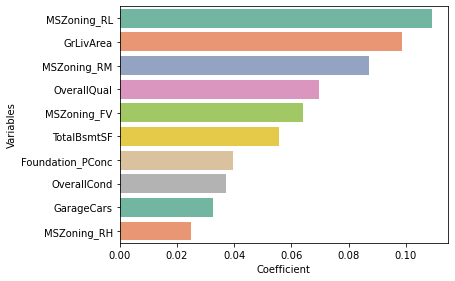

In [78]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Variables', x='Coefficient', palette='Set2', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

## 6.2.2 Ridge Regression

In [79]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016071,0.000650,0.014391,0.004400,0.0001,{'alpha': 0.0001},-0.088568,-0.070435,-0.083891,-0.077817,...,-0.080392,0.006092,24,-0.068068,-0.073635,-0.069029,-0.071325,-0.069858,-0.070383,0.001946
1,0.012539,0.003155,0.006482,0.003373,0.001,{'alpha': 0.001},-0.088567,-0.070436,-0.083891,-0.077816,...,-0.080391,0.006092,23,-0.068068,-0.073635,-0.069029,-0.071325,-0.069858,-0.070383,0.001946
2,0.013075,0.003934,0.009005,0.003347,0.01,{'alpha': 0.01},-0.088562,-0.070438,-0.083890,-0.077811,...,-0.080389,0.006090,22,-0.068067,-0.073634,-0.069029,-0.071323,-0.069859,-0.070382,0.001945
3,0.006645,0.003333,0.003205,0.003925,0.05,{'alpha': 0.05},-0.088538,-0.070449,-0.083886,-0.077787,...,-0.080379,0.006081,21,-0.068062,-0.073629,-0.069030,-0.071317,-0.069859,-0.070379,0.001944
4,0.006865,0.002443,0.003408,0.003785,0.1,{'alpha': 0.1},-0.088509,-0.070463,-0.083882,-0.077759,...,-0.080367,0.006071,20,-0.068061,-0.073623,-0.069031,-0.071310,-0.069860,-0.070377,0.001942


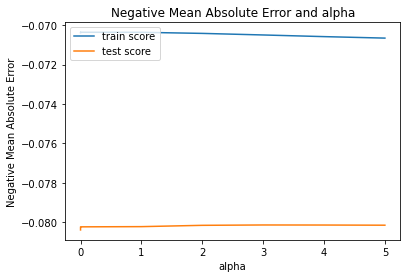

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [82]:
# get the best estimator for lambda

model_cv.best_estimator_

Ridge(alpha=3.0)

In [83]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00473994,  0.00821456,  0.02062959,  0.06831885,  0.03721866,
        0.00140808,  0.01230737, -0.01149582,  0.05544992,  0.01198405,
        0.01237306,  0.08348272,  0.01091585,  0.00548305,  0.01058335,
        0.00201991,  0.00701393,  0.03169584,  0.01015773,  0.00929202,
       -0.01708046, -0.02723952,  0.01453917,  0.00126946, -0.00237917,
        0.00909608,  0.00996049,  0.00939267,  0.01560311,  0.01581838,
        0.00635727,  0.01189394, -0.0186961 ,  0.01000563, -0.0034477 ,
       -0.00475652,  0.00249613,  0.01525549,  0.0584387 ,  0.02328456,
        0.10160885,  0.08301271,  0.03624849,  0.01342291,  0.03352812,
        0.00736485,  0.00188772, -0.00151973, -0.00924028, -0.00425311,
       -0.00497737, -0.00841116,  0.01283759, -0.0234423 , -0.01194343,
       -0.01625951, -0.02141506, -0.01428884, -0.02024825, -0.01081268,
        0.00357569,  0.01941288, -0.03575822, -0.00265552, -0.01636874,
       -0.00833397,  0.01120741, -0.00359624,  0.00347957,  0.00

In [84]:
# ridge regression
lm = Ridge(alpha=3)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9282144474423221
0.887319262814251


In [85]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.016622678907104352

In [86]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12892896845590734


In [87]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Variables':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Variables,Coefficient
0,MSSubClass,-0.0047
1,LotFrontage,0.0082
2,LotArea,0.0206
3,OverallQual,0.0683
4,OverallCond,0.0372
...,...,...
95,GarageType_Basment,0.0023
96,GarageType_BuiltIn,0.0116
97,GarageType_CarPort,-0.0002
98,GarageType_Detchd,0.0078


In [88]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0047,
 'LotFrontage': 0.0082,
 'LotArea': 0.0206,
 'OverallQual': 0.0683,
 'OverallCond': 0.0372,
 'MasVnrArea': 0.0014,
 'BsmtFinSF1': 0.0123,
 'BsmtUnfSF': -0.0115,
 'TotalBsmtSF': 0.0554,
 '1stFlrSF': 0.012,
 '2ndFlrSF': 0.0124,
 'GrLivArea': 0.0835,
 'BsmtFullBath': 0.0109,
 'FullBath': 0.0055,
 'HalfBath': 0.0106,
 'BedroomAbvGr': 0.002,
 'Fireplaces': 0.007,
 'GarageCars': 0.0317,
 'WoodDeckSF': 0.0102,
 'OpenPorchSF': 0.0093,
 'IsRemodelled': -0.0171,
 'BuiltOrRemodelAge': -0.0272,
 'OldOrNewGarage': 0.0145,
 'd_LotShape': 0.0013,
 'd_ExterQual': -0.0024,
 'd_BsmtQual': 0.0091,
 'd_BsmtExposure': 0.01,
 'd_BsmtFinType1': 0.0094,
 'd_HeatingQC': 0.0156,
 'd_KitchenQual': 0.0158,
 'd_FireplaceQu': 0.0064,
 'd_GarageFinish': 0.0119,
 'd_BldgType': -0.0187,
 'd_HouseStyle': 0.01,
 'd_Fence': -0.0034,
 'd_LotConfig': -0.0048,
 'd_MasVnrType': 0.0025,
 'd_SaleCondition': 0.0153,
 'MSZoning_FV': 0.0584,
 'MSZoning_RH': 0.0233,
 'MSZoning_RL': 0.1016,
 'MSZoning_RM': 0

In [89]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Variables]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [90]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Variables', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Variables'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Variables,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.1016
4,GrLivArea,True,1,0.0835
11,MSZoning_RM,True,1,0.0830
0,OverallQual,True,1,0.0683
8,MSZoning_FV,True,1,0.0584
3,TotalBsmtSF,True,1,0.0554
14,Foundation_PConc,True,1,0.0406
1,OverallCond,True,1,0.0372
5,GarageCars,True,1,0.0317
9,MSZoning_RH,True,1,0.0233


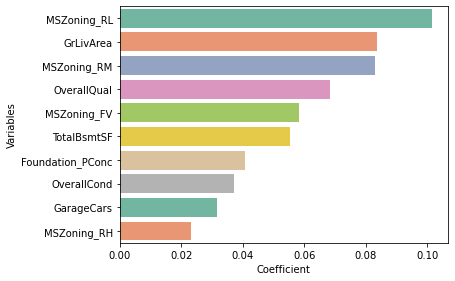

In [91]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Variables', x='Coefficient', palette='Set2', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

# Conclusion :

**The optimal lambda value in case of Ridge and Lasso is as below:**

* Ridge - 3
* Lasso - 0.0002

**The  mean squared error (MSE) in case of Ridge and Lasso are:**

* Ridge - 0.016622678907104352
* Lasso - 0.01640884144692063

The Mean Squared Error of Lasso is slightly lower than that of Ridge

**The Root mean squared error (RMSE) in case of Ridge and Lasso are:**

* Ridge - 0.12892896845590734
* Lasso - 0.12809700014801528

**The R-squared (R2)  in case of LinearRegression,Ridge and Lasso are:**

* LinearRegression-

    X_train=0.9284533666659978
    
    X_test=0.8852879905271767
    
    
* Ridge -

   X_train=0.9282144474423221

  X_test= 0.887319262814251
  
  
* Lasso - 

  X_train=0.9280209549683506

  X_test=0.8887688103141508
  
  
  The performance of model slightly higher in Lasso because test value is increased 
  



Also, since Lasso helps in feature reduction (as the coefficient value of feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

**Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.**